In [1]:
import pandas as pd
from src.paths import TRANSFORMED_DATA_DIR

df = pd.read_parquet(TRANSFORMED_DATA_DIR / 'tabular_data.parquet')
df

,rides_previous_672_hour,rides_previous_671_hour,rides_previous_670_hour,rides_previous_669_hour,rides_previous_668_hour,rides_previous_667_hour,rides_previous_666_hour,rides_previous_665_hour,rides_previous_664_hour,rides_previous_663_hour,...,rides_previous_7_hour,rides_previous_6_hour,rides_previous_5_hour,rides_previous_4_hour,rides_previous_3_hour,rides_previous_2_hour,rides_previous_1_hour,pickup_hour,pickup_location_id,target_rides_next_hour
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-01-29,1,0.0
1,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2022-01-30,1,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,2022-01-31,1,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,1.0,0.0,1.0,1.0,0.0,0.0,2022-02-01,1,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-02-02,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89300,3.0,0.0,2.0,3.0,2.0,3.0,13.0,8.0,9.0,9.0,...,6.0,5.0,3.0,1.0,6.0,1.0,3.0,2022-12-27,265,3.0
89301,6.0,4.0,0.0,0.0,2.0,0.0,14.0,7.0,8.0,4.0,...,4.0,2.0,1.0,2.0,2.0,2.0,8.0,2022-12-28,265,1.0
89302,7.0,2.0,3.0,4.0,7.0,4.0,10.0,9.0,7.0,11.0,...,2.0,3.0,5.0,1.0,1.0,0.0,8.0,2022-12-29,265,3.0
89303,6.0,5.0,4.0,3.0,0.0,3.0,11.0,12.0,9.0,10.0,...,3.0,3.0,1.0,2.0,0.0,1.0,2.0,2022-12-30,265,7.0


In [2]:
from datetime import datetime
from src.data_split import train_test_split

X_train, y_train, X_test, y_test = train_test_split(
    df,
    cutoff_date=datetime(2022, 6, 1, 0, 0, 0),
    target_column_name='target_rides_next_hour'
)

print(f'{X_train.shape=}')
print(f'{y_train.shape=}')
print(f'{X_test.shape=}')
print(f'{y_test.shape=}')

X_train.shape=(32595, 674)
y_train.shape=(32595,)
X_test.shape=(56710, 674)
y_test.shape=(56710,)


In [3]:
import numpy as np

class BaselineModelPreviousHour:
    """
    Prediction = actual demand observed in the last hour
    Arguments:
        X_train: pd.DataFrame
        y_train: pd.Series

    Returns:
        y_pred: np.array
    """
    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        pass
    
    def predict(self, X_test: pd.DataFrame) -> np.array:
        """"""
        return X_test[f'rides_previous_1_hour']

In [4]:
# test the model - prev hour   
model = BaselineModelPreviousHour()
predictions = model.predict(X_test)
predictions

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
56705    3.0
56706    8.0
56707    8.0
56708    2.0
56709    7.0
Name: rides_previous_1_hour, Length: 56710, dtype: float32

In [5]:
from sklearn.metrics import mean_absolute_error

test_mae = mean_absolute_error(y_test, predictions)
print(f'{test_mae=:.4f}')

test_mae=6.0558


In [6]:
import pandas as pd
import numpy as np

class BaselineModelPreviousWeek:
    """
    Prediction = actual demand observed at t - 7 days
    Arguments:
        X_train: pd.DataFrame
        y_train: pd.Series

    Returns:
        y_pred: np.array
    """
    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        pass
    
    def predict(self, X_test: pd.DataFrame) -> np.array:
        """"""
        return X_test[f'rides_previous_{7*24}_hour']

In [7]:
# test the model - prev week
model = BaselineModelPreviousWeek()
predictions = model.predict(X_test)

In [8]:
test_mae = mean_absolute_error(y_test, predictions)
print(f'{test_mae=:.4f}')

test_mae=3.6811


In [26]:
class BaselineModelLast4Weeks:
    """
    Prediction = actual demand observed at t - 7 days, t - 14 days, t - 21 days, t - 28 days
    Arguments:
        X_train: pd.DataFrame
        y_train: pd.Series

    Returns:
        y_pred: np.array
    """
    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        pass
    
    def predict(self, X_test: pd.DataFrame) -> pd.Series:
        """
        Returns: 
            y_pred: pd.Series as a weighted average of the previous 4 weeks"""
        return 0.25*(
            X_test[f'rides_previous_{7*24}_hour'] + \
            X_test[f'rides_previous_{2*7*24}_hour'] + \
            X_test[f'rides_previous_{3*7*24}_hour'] + \
            X_test[f'rides_previous_{4*7*24}_hour']
        )

In [27]:
# test the model - last 4 weeks
model = BaselineModelLast4Weeks()
predictions = model.predict(X_test)

test_mae = mean_absolute_error(y_test, predictions)
print(f'{test_mae=:.4f}')

test_mae=3.1963


Experiment - 2 months of historical data

In [37]:
import pandas as pd
from src.paths import TRANSFORMED_DATA_DIR

df = pd.read_parquet(TRANSFORMED_DATA_DIR / 'tabular_data_2_months.parquet')
df

,rides_previous_1344_hour,rides_previous_1343_hour,rides_previous_1342_hour,rides_previous_1341_hour,rides_previous_1340_hour,rides_previous_1339_hour,rides_previous_1338_hour,rides_previous_1337_hour,rides_previous_1336_hour,rides_previous_1335_hour,...,rides_previous_7_hour,rides_previous_6_hour,rides_previous_5_hour,rides_previous_4_hour,rides_previous_3_hour,rides_previous_2_hour,rides_previous_1_hour,pickup_hour,pickup_location_id,target_rides_next_hour
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2022-02-26,1,1.0
1,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,1.0,2.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2022-02-27,1,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,3.0,2.0,0.0,2.0,0.0,0.0,0.0,2022-02-28,1,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-03-01,1,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,0.0,2022-03-02,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81880,4.0,6.0,0.0,1.0,1.0,7.0,22.0,18.0,25.0,17.0,...,6.0,5.0,3.0,1.0,6.0,1.0,3.0,2022-12-27,265,3.0
81881,2.0,6.0,4.0,2.0,4.0,10.0,16.0,17.0,20.0,12.0,...,4.0,2.0,1.0,2.0,2.0,2.0,8.0,2022-12-28,265,1.0
81882,5.0,1.0,3.0,1.0,2.0,8.0,18.0,9.0,18.0,19.0,...,2.0,3.0,5.0,1.0,1.0,0.0,8.0,2022-12-29,265,3.0
81883,8.0,6.0,3.0,3.0,2.0,8.0,15.0,16.0,8.0,8.0,...,3.0,3.0,1.0,2.0,0.0,1.0,2.0,2022-12-30,265,7.0


In [38]:
from datetime import datetime
from src.data_split import train_test_split

X_train, y_train, X_test, y_test = train_test_split(
    df,
    cutoff_date=datetime(2022, 6, 1, 0, 0, 0),
    target_column_name='target_rides_next_hour'
)

print(f'{X_train.shape=}')
print(f'{y_train.shape=}')
print(f'{X_test.shape=}')
print(f'{y_test.shape=}')

X_train.shape=(25175, 1346)
y_train.shape=(25175,)
X_test.shape=(56710, 1346)
y_test.shape=(56710,)


In [39]:
class BaselineModelLast8Weeks:
    """
    Prediction = actual demand observed at t - 7 days, t - 14 days, t - 21 days, t - 28 days, 
                                           t - 35 days, t - 42 days, t - 49 days, t - 56 days
    Arguments:
        X_train: pd.DataFrame
        y_train: pd.Series

    Returns:
        y_pred: np.array
    """
    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        pass
    
    def predict(self, X_test: pd.DataFrame) -> pd.Series:
        """
        Returns: 
            y_pred: pd.Series as a weighted average of the previous 8 weeks"""
        return 0.125*(
            X_test[f'rides_previous_{7*24}_hour'] + \
            X_test[f'rides_previous_{2*7*24}_hour'] + \
            X_test[f'rides_previous_{3*7*24}_hour'] + \
            X_test[f'rides_previous_{4*7*24}_hour'] + \
            X_test[f'rides_previous_{5*7*24}_hour'] + \
            X_test[f'rides_previous_{6*7*24}_hour'] + \
            X_test[f'rides_previous_{7*7*24}_hour'] + \
            X_test[f'rides_previous_{8*7*24}_hour']
        )

In [40]:
# test the model - last 8 weeks
model = BaselineModelLast8Weeks()
predictions = model.predict(X_test)

test_mae = mean_absolute_error(y_test, predictions)
print(f'{test_mae=:.4f}')

test_mae=3.0726


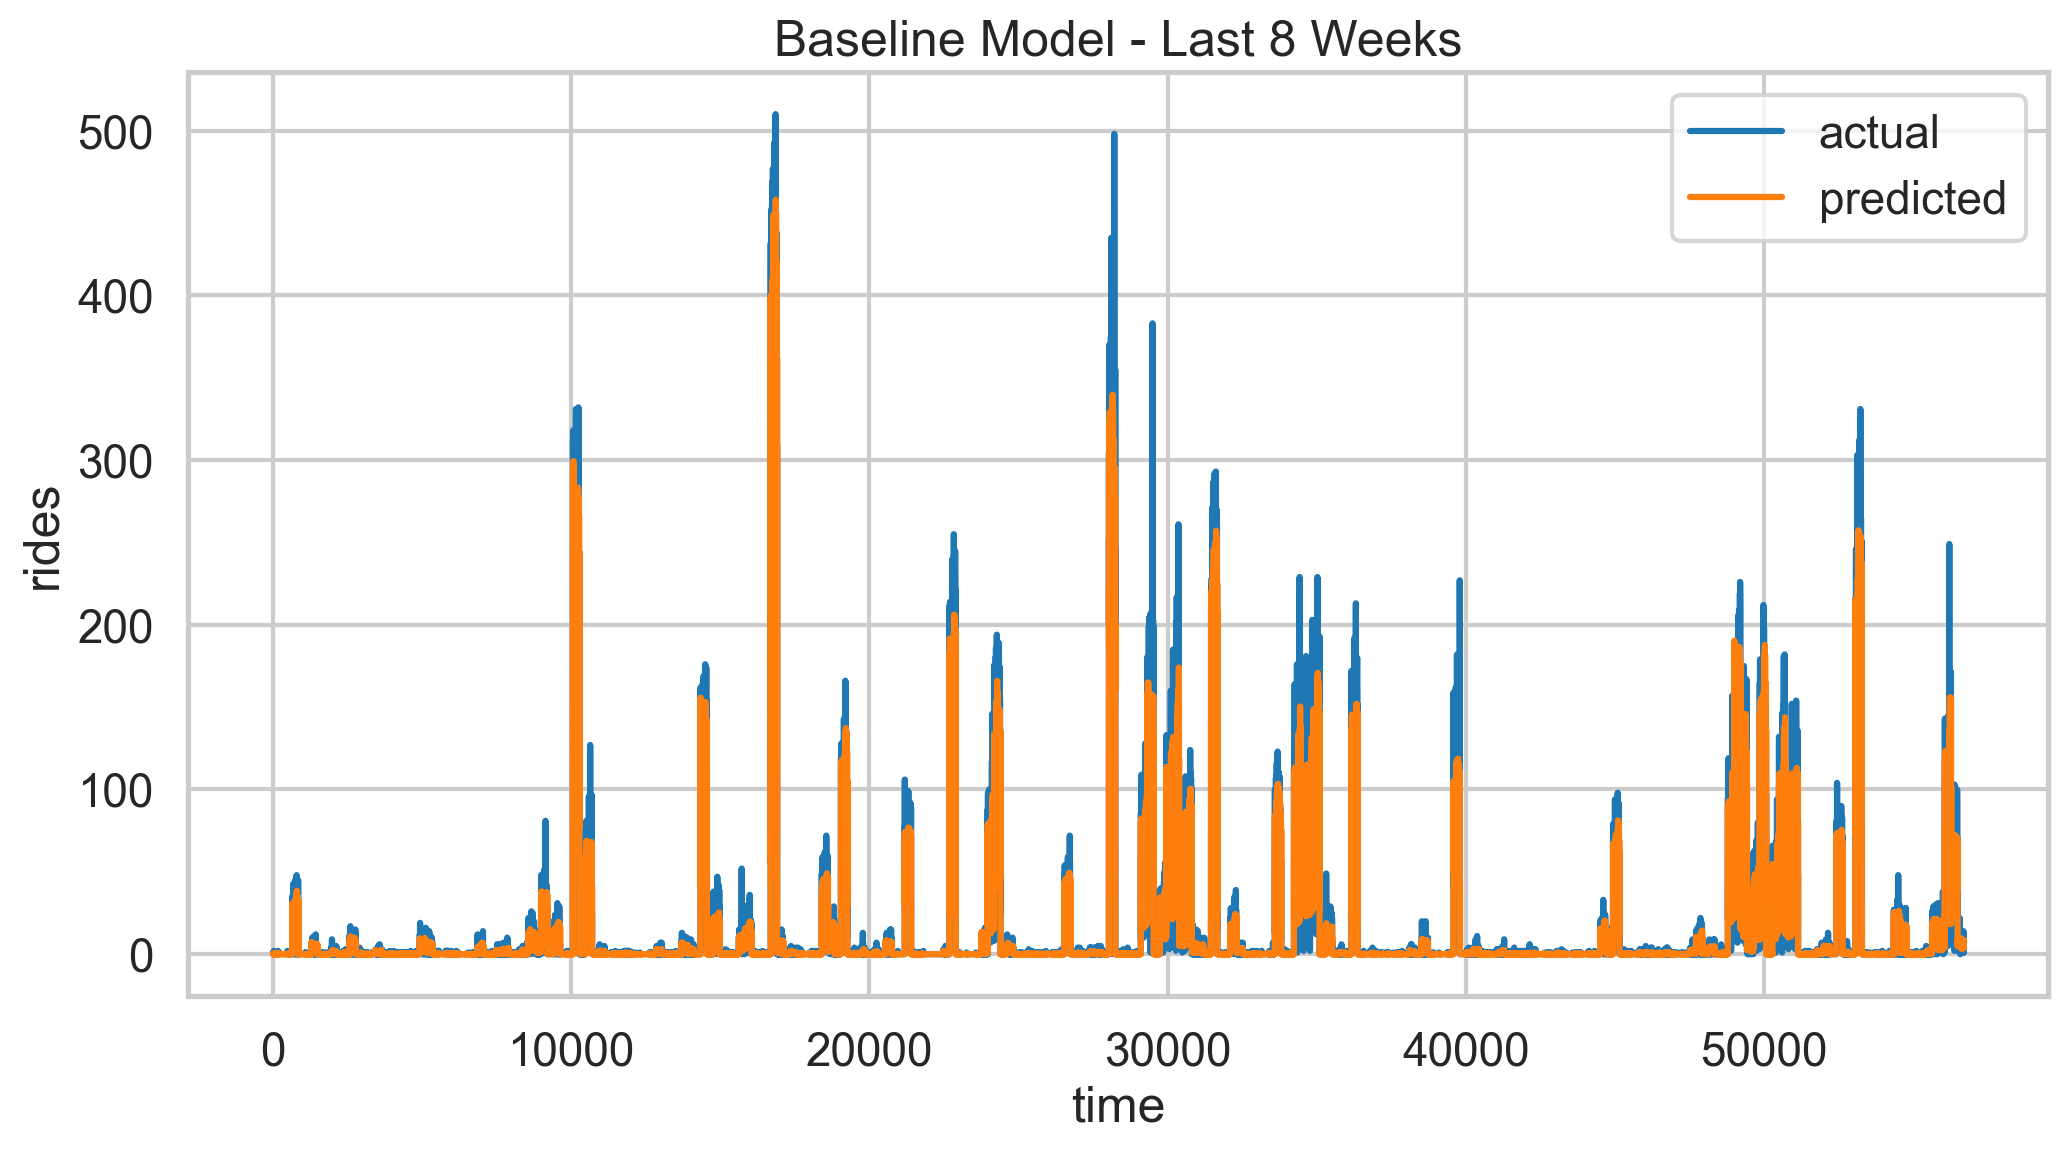

In [44]:
# visualize the predictions
import matplotlib.pyplot as plt
import seaborn as sns
# retina display
%config InlineBackend.figure_format = 'retina'

sns.set_style('whitegrid')
sns.set_context('talk')

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test.index, y_test, label='actual')
ax.plot(y_test.index, predictions, label='predicted')
ax.title.set_text('Baseline Model - Last 8 Weeks')
ax.set_xlabel('time')
ax.set_ylabel('rides')
ax.legend()
plt.show()

In [43]:
# visualize the predictions using plotly
import plotly.express as px
import plotly.graph_objects as go

# retina display
%config InlineBackend.figure_format = 'retina'

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test.index, y=y_test, name='actual'))
fig.add_trace(go.Scatter(x=y_test.index, y=predictions, name='predicted'))
fig.update_layout(
    title='Baseline Model - Last 8 Weeks',
    xaxis_title='time',
    yaxis_title='rides'
)
fig.show()

## Summary
As we can see from the results above, the more timeframe we take as an input (i.e. the more historical data we use), the better the results. This is expected as we are using a baseline model that is not taking into account any of the features we have created. The model is just using the historical data to predict the next day's price.

Results:
<br> `BaselineModelPreviousWeek() - 1 week of historical data - test_mae=3.6811`
<br> `BaselineModelLast4Weeks() - 4 weeks of historical data - test_mae=3.1963`
<br> `BaselineModelLast8Weeks() - 8 weeks of historical data - test_mae=3.0726`
